1) Parse data with BeautifulSoup and extract it

In this step, I checked if BeautifulSoup, Pandas, NumPy, Requests, and Matplotlib were installed. Afterwards, I read the webpage and parsed it with BeautifulSoup. I used BeautifulSoup's find function to find the table with the raw data in the webpage that I parsed.

In [93]:
try:
    import pandas as pd
    import numpy as np
    import scipy
    import requests
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")


opened_webpage = requests.get("https://populationstat.com/cities/")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.text, 'html.parser')
print ("Webpage loaded and parsed successfully...")

raw_data = bs.find('table',{'class':"ph col5"})
print(raw_data)

Imported all libraries successfully...
Webpage opened successfully...
Webpage loaded and parsed successfully...
<table class="ph col5" data-sortable="" id="ph1"><thead><tr><th data-sorted="true" data-sorted-direction="ascending">Rank</th><th>City</th><th>Country</th><th>Population, Urban Area</th><th>Population, City</th></tr></thead><tbody><tr class="y10"><td>1</td><td><a href="/japan/tokyo">Tokyo</a></td><td><a href="/japan/">Japan</a></td><td>37,295,858</td><td>8,336,599</td></tr><tr class="y10"><td>2</td><td><a href="/india/delhi">Delhi</a></td><td><a href="/india/">India</a></td><td>31,772,904</td><td>10,927,986</td></tr><tr class="y10"><td>3</td><td><a href="/china/shanghai">Shanghai</a></td><td><a href="/china/">China</a></td><td>28,278,218</td><td>22,315,474</td></tr><tr class="y10"><td>4</td><td><a href="/bangladesh/dhaka">Dhaka</a></td><td><a href="/bangladesh/">Bangladesh</a></td><td>22,233,919</td><td>10,356,500</td></tr><tr class="y10"><td>5</td><td><a href="/brazil/sao-pa

2) Transform data

Transforming the data required multiple steps of varying importance. Most importantly, I had to convert the raw data into a DataFrame. So, I used the read_html function to search for table elements and to return the raw data as a list of DataFrames. Afterwards, I used the DataFrame function to return the first DataFrame. I printed a few elements in the DataFrame to check the DataFrame columns, rows, and data. Since I was satisfied with the DataFrame, I cleaned it by replacing null entries with the label "No data." Afterwards, I checked the data for noise by printing the DataFrame information and looking at the "Non-Null Count." I renamed a couple columns in the DataFrame to make them easier to understand using the rename function. Lastly, I printed the entire DataFrame to ensure that I was satisfied with my cleaned data before loading it.

In [31]:
df = pandas.read_html(str(raw_data))
df = pandas.DataFrame(df[0])
df.head()

,Rank,City,Country,"Population, Urban Area","Population, City"
0,1,Tokyo,Japan,37295890,8336599
1,2,Delhi,India,31772479,10927986
2,3,Shanghai,China,28277872,22315474
3,4,Dhaka,Bangladesh,22233565,10356500
4,5,Sao Paulo,Brazil,22365989,10021295


In [54]:
df = df.replace("-","No data")
df

,Rank,City,Country,Urban Area Population,City Population
0,1,Tokyo,Japan,37295890,8336599
1,2,Delhi,India,31772479,10927986
2,3,Shanghai,China,28277872,22315474
3,4,Dhaka,Bangladesh,22233565,10356500
4,5,Sao Paulo,Brazil,22365989,10021295
...,...,...,...,...,...
495,496,Da Nang,Vietnam,1177718,988561
496,497,Liupanshui,China,1166085,1183000
497,498,Omsk,Russia,1181332,1172070
498,499,Nnewi,Nigeria,1156105,193987


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   500 non-null    int64 
 1   City                   500 non-null    object
 2   Country                500 non-null    object
 3   Urban Area Population  500 non-null    int64 
 4   City Population        500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


In [100]:
df = df.rename(columns={"Population, Urban Area":"Urban Area Population","Population, City":"City Population"})
df

,Rank,City,Country,Urban Area Population,City Population
0,1,Tokyo,Japan,37295890,8336599
1,2,Delhi,India,31772479,10927986
2,3,Shanghai,China,28277872,22315474
3,4,Dhaka,Bangladesh,22233565,10356500
4,5,Sao Paulo,Brazil,22365989,10021295
...,...,...,...,...,...
495,496,Da Nang,Vietnam,1177718,988561
496,497,Liupanshui,China,1166085,1183000
497,498,Omsk,Russia,1181332,1172070
498,499,Nnewi,Nigeria,1156105,193987


3) Load data

With the to_csv Pandas function, I was able to convert the DataFrame to CSV data.

In [101]:
df.to_csv("Highest_City_Populations.csv")

4) Data analysis

In order to perform some analysis on the data, I decided to begin by initializing some of the column names in the DataFrame as variables. Afterwards, I used the describe function to get a statistical summary of two of the columns with data on the urban area population and the city population. I chose these two columns because the other columns either did not have numerical data or their numerical data is already a form of analysis. Specifically, the rank column data is just ordinal data describing the highest urban area populations.  

In [104]:
column_names = df.columns
print(column_names)

urban_area_population = df["Urban Area Population"]
city_population = df["City Population"]
city = df["City"]

# obtain descriptive statistics for the columns
urban_stats = urban_area_population.describe()
city_population_stats = city_population.describe()
print(urban_stats)
print(city_population_stats)

Index(['Rank', 'City', 'Country', 'Urban Area Population', 'City Population'], dtype='object')
count    5.000000e+02
mean     3.671910e+06
std      4.279285e+06
min      1.156105e+06
25%      1.502049e+06
50%      2.168406e+06
75%      3.762602e+06
max      3.729589e+07
Name: Urban Area Population, dtype: float64
count         500
unique        455
top       No data
freq           45
Name: City Population, dtype: object


5) Data Visualization

For my data visualization, I decided to plot the urban area populations against cities in a bar graph and a scatter plot. I also decided to plot the urban area population data as a boxplot. Because there are 500 cities in the DataFrame, I could not include all of the datapoints without overcrowding the x-axis. So, I limited the x-axis data with the xlim function in the bar graph and in the scatterplot.

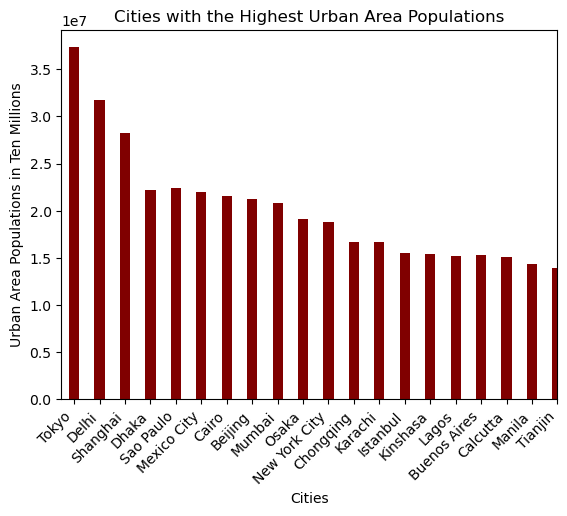

In [90]:
plt.xticks(rotation=45, ha='right')
plt.bar(city, urban_area_population, color ='maroon', width = 0.4)
plt.xlim(-0.5,19.0)

plt.xlabel("Cities")
plt.ylabel("Urban Area Populations in Ten Millions")

plt.title("Cities with the Highest Urban Area Populations")

plt.savefig("bar_graph.png")

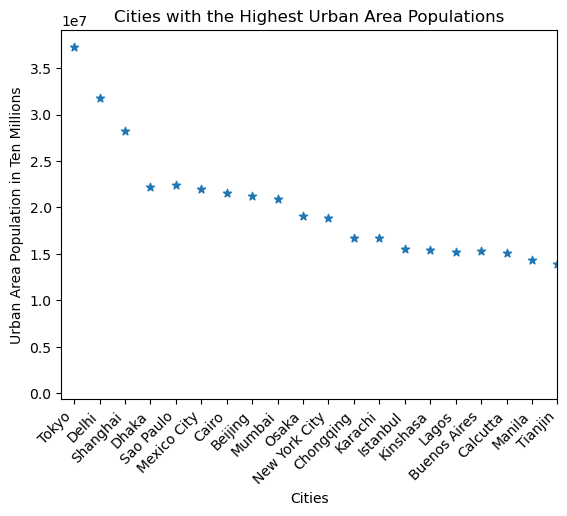

In [91]:
plt.scatter(city,urban_area_population, marker="*")
plt.xticks(rotation=45, ha='right')
plt.xlim(-0.5,19.0)

plt.xlabel("Cities")
plt.ylabel("Urban Area Population in Ten Millions")

plt.title("Cities with the Highest Urban Area Populations")

plt.savefig("scatter_plot.png")

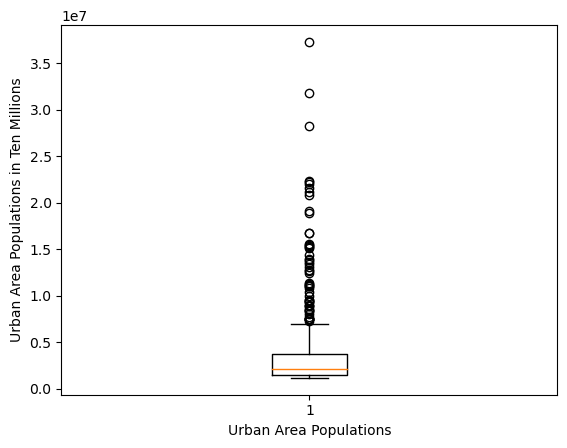

In [92]:
plt.boxplot(urban_area_population)

plt.xlabel("Urban Area Populations")
plt.ylabel("Urban Area Populations in Ten Millions")

plt.savefig("boxplot.png")

6) Insights

The descriptive statistics for the urban area population mention that the mean of the populations is about 3,670,000 and the standard deviation is about 4,280,000. This standard deviation is surprising considering that the maximum value in this column is about 37,200,000. This descriptive statistic combined with the depiction of urban area populations in the boxplot diagram suggest that this city, Tokyo, may be an outlier in terms of urban area population. In fact, the boxplot diagram indicates that the middle half of the cities included in this DataFrame have urban area populations below 5,000,000.